###  **Credit Risk Prediction**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:

train_df = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")
test_df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")

train_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:

print("Shape of train data:", train_df.shape)
print("\nColumns:")
print(train_df.columns)
train_df.info()


Shape of train data: (367, 12)

Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 

###  **Handle Missing Data**

In [4]:

# Check missing values
train_df.isnull().sum()


,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [6]:

# Fill missing values
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)


### **Visualize Loan Amount**

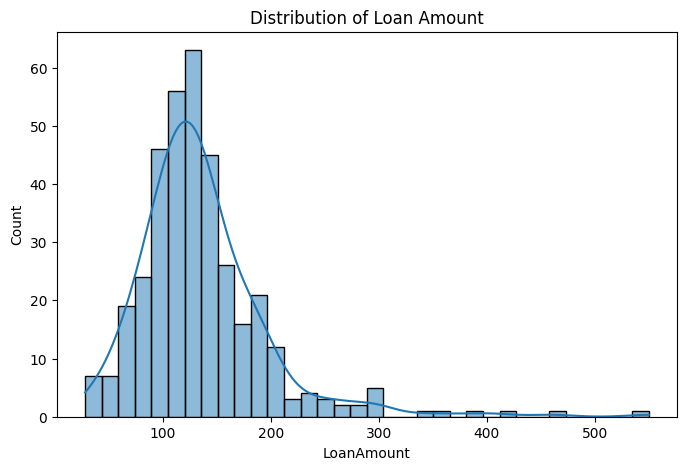

In [7]:

plt.figure(figsize=(8,5))
sns.histplot(train_df["LoanAmount"], kde=True)
plt.title("Distribution of Loan Amount")
plt.show()


### Step 6: Education vs Loan Status

In [10]:
print(train_df.columns)




Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


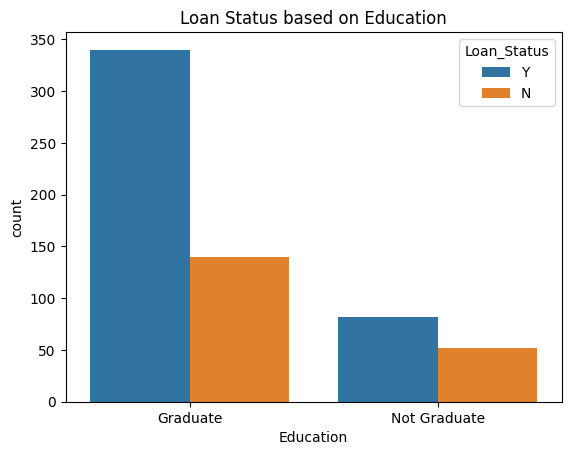

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd

train_df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Education", hue="Loan_Status", data=train_df)
plt.title("Loan Status based on Education")
plt.show()




### **Visualize Applicant Income**

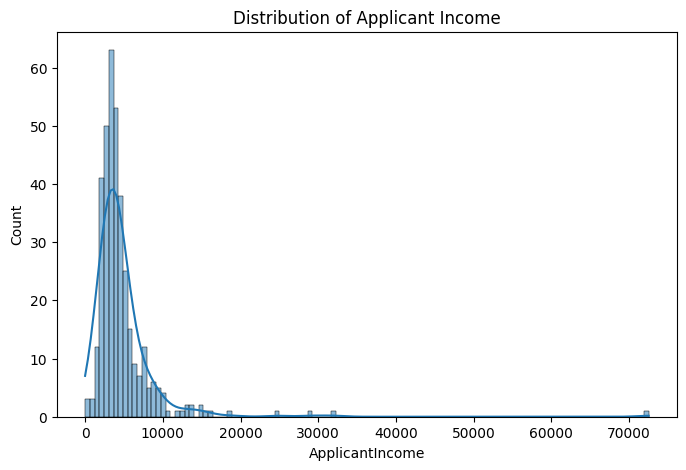

In [13]:

plt.figure(figsize=(8,5))
sns.histplot(train_df["ApplicantIncome"], kde=True)
plt.title("Distribution of Applicant Income")
plt.show()


### **Encode Categorical Features**

In [20]:

# Drop Loan_ID
train_df.drop('Loan_ID', axis=1, inplace=True)

# Encode Loan_Status to binary
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Label Encoding for categorical variables
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
le = LabelEncoder()
for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col])


### **Define Features and Target**

In [21]:

X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']


### **Train-Test Split**

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Logistic Regression Model**

In [26]:

from sklearn.impute import SimpleImputer

# Create an imputer object to fill missing values with mean (for numerical columns)
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now train the model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_imputed, y_train)
y_pred_lr = lr_model.predict(X_test_imputed)


### **Evaluate Logistic Regression**

In [27]:

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7967479674796748
Confusion Matrix:
[[19 24]
 [ 1 79]]


### **Decision Tree Model**

In [28]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


###  **Evaluate Decision Tree

In [29]:

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6422764227642277
Confusion Matrix:
[[25 18]
 [26 54]]
